In [23]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.simplefilter('ignore')

In [24]:
start = '2021-08-31'
end = '2022-08-31'
company_code = '^N225'

In [28]:
df = data.DataReader(company_code, 'yahoo', start, end)
date=df.index
close=df['Adj Close']

#def MACD(df):
#    df['EMA12'] = df.close.ewm(sapn=12).mean()
#    df['EMA26'] = df.close.ewm(sapn=26).mean()
#    df['MACD'] = df.EMA12 - df.EMA26
#    df['signal'] = df.MACD.ewm(span=9).mean()
#    print('indicators added')
#mpf.axhline(y=FL6, color="green", linestyle=":", label="FL6")
#mpf.axhline(y=FL5, color="green", linestyle=":", label="FL5")
#mpf.axhline(y=FL4, color="green", linestyle=":", label="FL4")
#mpf.axhline(y=FL3, color="green", linestyle=":", label="FL3")
#mpf.axhline(y=FL2, color="green", linestyle=":", label="FL2")
#mpf.axhline(y=FL1, color="green", linestyle=":", label="FL1")
#mpf.axhline(y=FL0, color="green", linestyle=":", label="FL0")
df['MACD'], df['signal'], df['hist'], = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [26]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,signal,hist
Date,,,,,,,,,
2021-08-31,28158.949219,27602.210938,27690.769531,28089.539062,75900000,28089.539062,NaN,NaN,NaN
2021-09-01,28457.669922,28179.039062,28179.039062,28451.019531,64800000,28451.019531,NaN,NaN,NaN
2021-09-02,28626.199219,28412.910156,28522.460938,28543.509766,60100000,28543.509766,NaN,NaN,NaN
2021-09-03,29149.650391,28607.869141,28626.480469,29128.109375,74900000,29128.109375,NaN,NaN,NaN
2021-09-06,29705.039062,29469.349609,29501.220703,29659.890625,68300000,29659.890625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-25,28534.710938,28357.029297,28415.109375,28479.009766,53700000,28479.009766,350.724977,406.073534,-55.348557
2022-08-26,28792.929688,28608.699219,28639.470703,28641.380859,49100000,28641.380859,335.474430,391.953713,-56.479283
2022-08-29,28179.089844,27788.119141,28161.060547,27878.960938,64100000,27878.960938,258.883103,365.339591,-106.456488


ConversionError: Failed to convert value(s) to axis units: '2021-08-31'

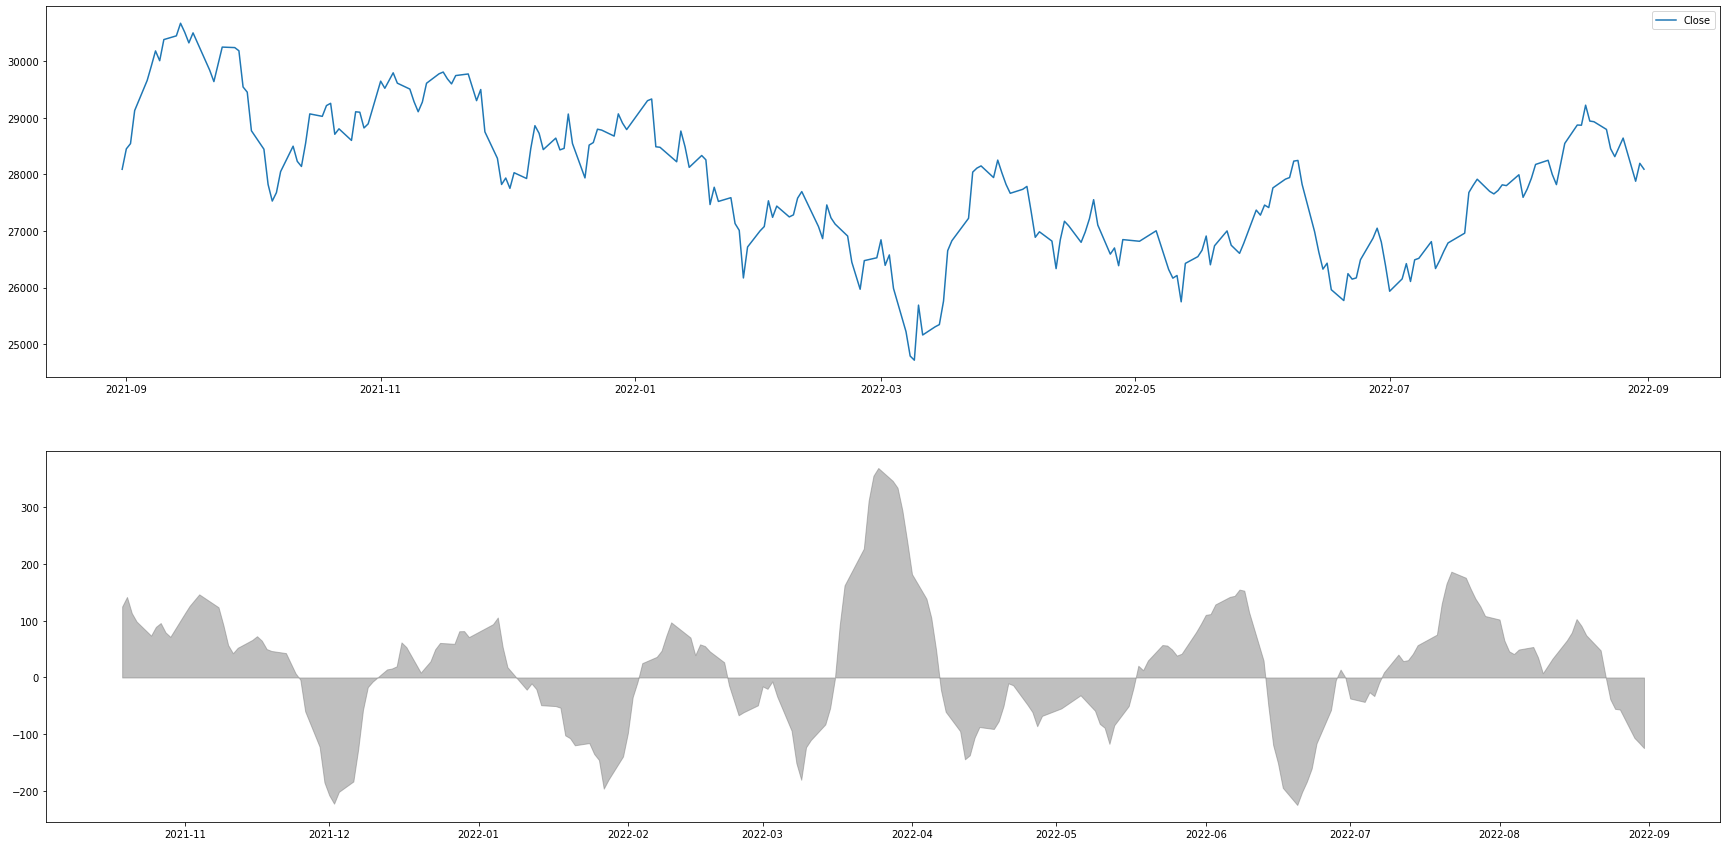

In [27]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1) #分割（縦,横,グラフ番号）
plt.plot(date,close,label='Close')
plt.legend() #ラベルを表示するためのメソッド

plt.subplot(2,1,2)
plt.fill_between(date, df['hist'], color ='grey', alpha=0.5, label='hist')
plt.hlines(0,start,end,"grey",linestyles="dashed")
plt.plot(date,df['MACD'],color='red',label='MACD')
plt.plot(date,df['signl'],color='green',label='signal')
plt.legend()